In [2]:
import pandas as pd
import numpy as np
df_train_filtered = pd.read_pickle('./data/df_train_filtered.pkl')


In [3]:
from sklearn.model_selection import train_test_split

X = df_train_filtered.drop('Hinta', axis=1)
y = df_train_filtered['Hinta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=df_train_filtered['Kaupunginosa'], random_state=42)





In [4]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

def rmsle_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true+1), np.log1p(y_pred+1)))

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean squared error: {mse:.2f}\nMean absolute error: {mae:.2f}\nR²-arvo: {r2:.2f}\nRMSLE: {rmsle_score(y_test, predictions):.2f}")


Mean squared error: 9450.37
Mean absolute error: 68.02
R²-arvo: 0.63
RMSLE: 0.32


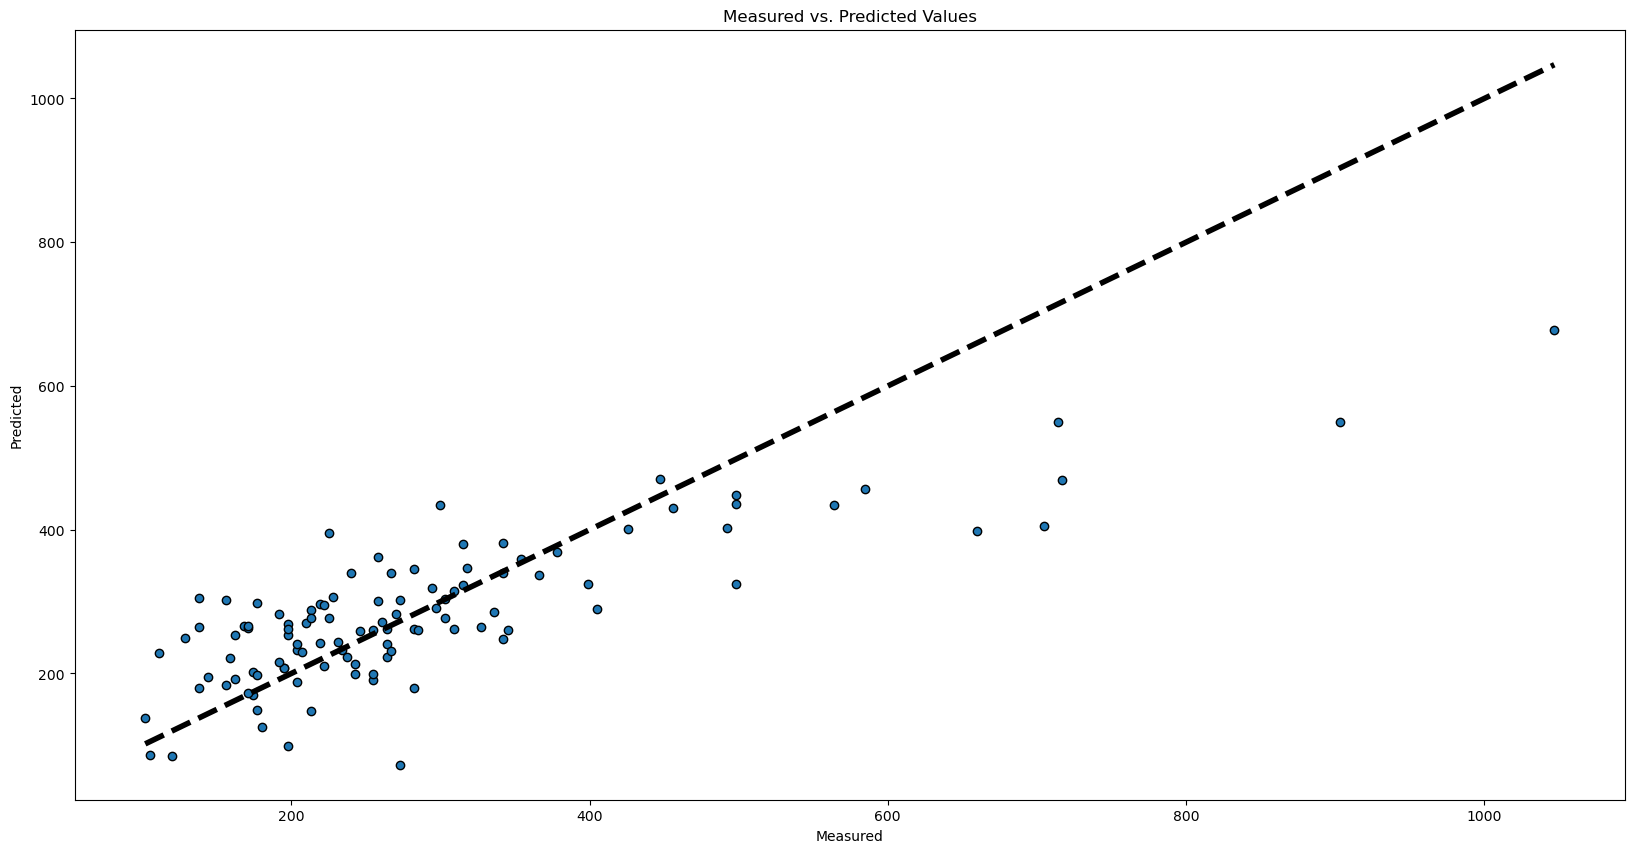

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()


In [7]:
# import optuna
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.model_selection import train_test_split
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import KFold



# virhe_mallit = ['reg:absoluteerror', 'reg:squarederror']
# virhe_nimi = ['Mean Absolute Error', 'Mean Squared Error']

# def objective(trial, data, target, obj_type):
#     # Määritellään parametrit uudella tavalla
#     param = {
#         # 'tree_method': 'hist',  # Päivitetty ohjeen mukaisesti
#         # 'device': 'cuda',  # Käytä GPU:ta, jos mahdollista
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.8, 1.0),
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.001]),
#         'n_estimators': trial.suggest_int('n_estimators', 1, 491, step=10),
#         'max_depth': trial.suggest_int('max_depth', 3, 11),
#         'gamma': trial.suggest_categorical('gamma', [0, 1, 5]),
#         'reg_alpha': trial.suggest_categorical('reg_alpha', [0, 0.1, 0.5]),
#         'reg_lambda': trial.suggest_categorical('reg_lambda', [1, 1.5, 2]),
#         'n_jobs' : -2 
#     }

#     model = xgb.XGBRegressor(**param)
    
#     # Ristiinvalidointi
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#     scores = []

#     for train_idx, valid_idx in kfold.split(data):
#         train_x, valid_x = data.iloc[train_idx], data.iloc[valid_idx]
#         train_y, valid_y = target.iloc[train_idx], target.iloc[valid_idx]
        
#         model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=False)
#         preds = model.predict(valid_x)
#         if obj_type == 'reg:absoluteerror':
#             score = mean_absolute_error(valid_y, preds)
#         else:  
#             score = mean_squared_error(valid_y, preds)
#         scores.append(score)

#     return np.mean(scores)


# for idx, obj in enumerate(virhe_mallit):
#     study = optuna.create_study(direction='minimize')
#     study.optimize(lambda trial: objective(trial, X_train, y_train, obj), n_trials=100)
    
#     print(f"With objective: {virhe_nimi[idx]}")
#     print('Parhaat hyperparametrit: ', study.best_params)

#     # Kouluta malli parhailla hyperparametreilla koko koulutusdatasetillä
#     best_params = study.best_params
#     final_model = xgb.XGBRegressor(**best_params)
#     final_model.fit(X_train, y_train)

#     # Tee ennusteet testidatasetillä
#     predictions = final_model.predict(X_test)

#     # Laske ja tulosta suorituskykymetriikat
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
#     r2 = r2_score(y_test, predictions)
#     rmsle = rmsle_score(y_test, predictions)
#     print(f"Mean squared error: {mse:.2f}\nMean absolute error: {mae:.2f}\nRMLS: {rmsle:.2f}\nParhaan mallin R²-arvo: {r2:.4f}")

#     # Visualisoi todelliset arvot vs. ennustetut arvot
#     plt.figure(figsize=(20, 10))
#     plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
#     plt.xlabel('Measured')
#     plt.ylabel('Predicted')
#     plt.title(f'{virhe_nimi[idx]} Measured vs. Predicted Values')
#     plt.show()


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
With error: neg_mean_absolute_error
Ositus 0: 0.13284983128278632
Ositus 1: 0.1629727678030898
Ositus 2: 0.1190203856527787
Ositus 3: 0.1797078338938456
Ositus 4: 0.18799741301252654
Mean squared error: 2180.41
Mean absolute error: 28.87
RMSLE: 0.1419
Parhaan mallin R²-arvo: 0.9139


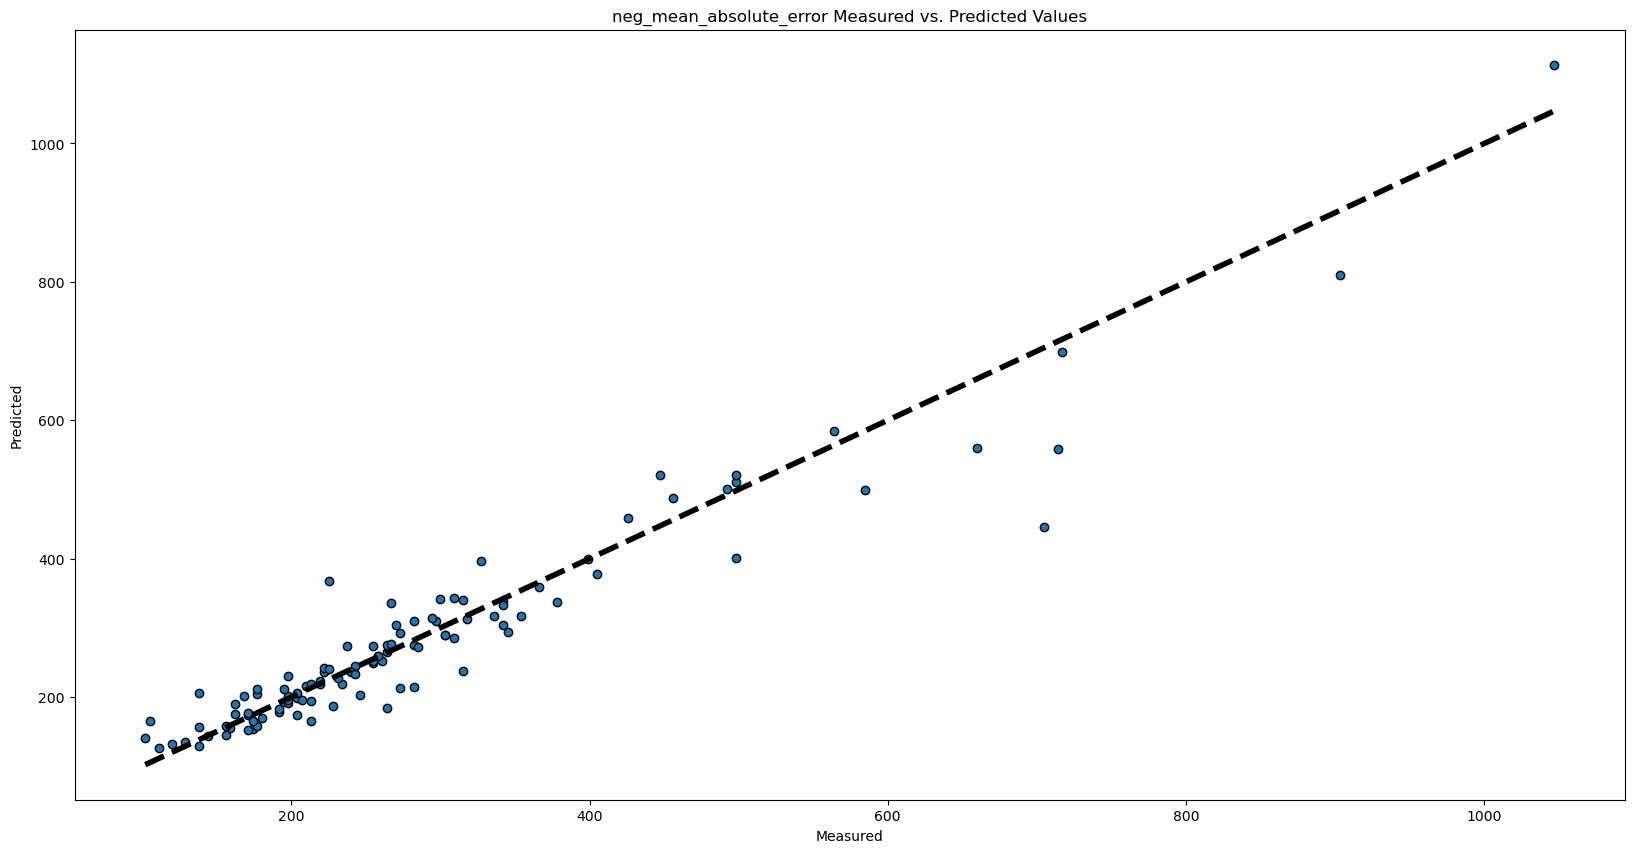

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
With error: neg_mean_squared_error
Ositus 0: 0.13634357148088308
Ositus 1: 0.14462118824177034
Ositus 2: 0.12119068782608555
Ositus 3: 0.16301349764761575
Ositus 4: 0.20035645726295562
Mean squared error: 2181.89
Mean absolute error: 29.15
RMSLE: 0.1369
Parhaan mallin R²-arvo: 0.9139


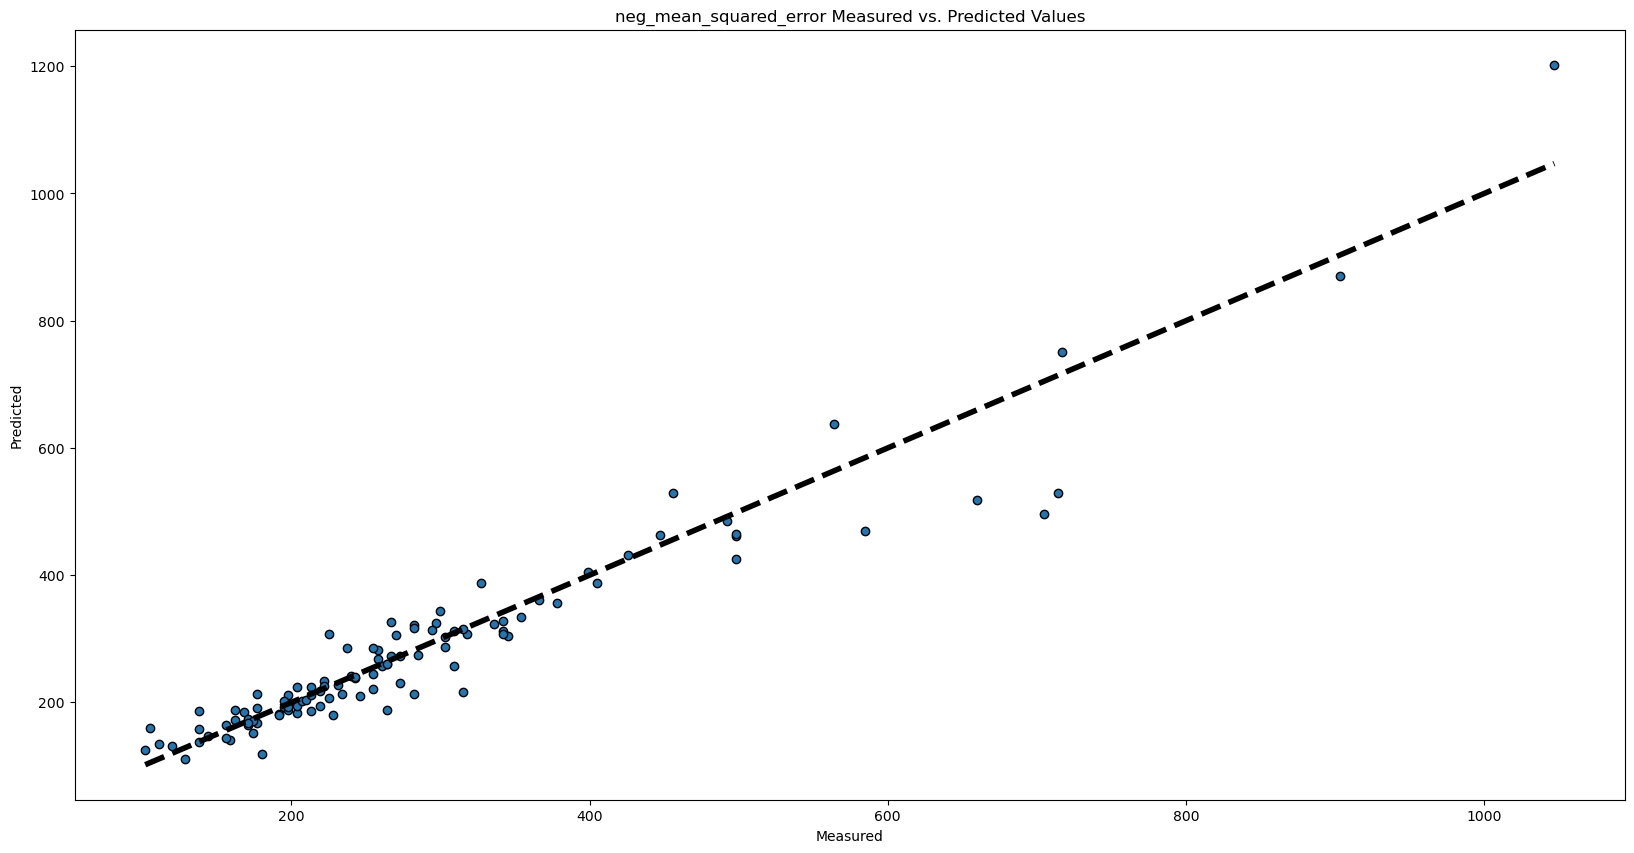

In [8]:
import numpy as np
import xgboost
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import timedelta
import matplotlib.pyplot as plt
import time 

from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):

    if np.any(y_pred <= 0):
        return 1e6

    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

 
virhe_mallit = [xgboost.XGBRegressor(objective='reg:absoluteerror'), xgboost.XGBRegressor(objective='reg:squarederror')]
virhe_nimi = ['neg_mean_absolute_error', 'neg_mean_squared_error']



for idx, malli in enumerate(virhe_mallit):
    time_start = time.time()
    param_space = {
        'n_estimators': np.arange(1, 500, 10),
        'max_depth': np.arange(3, 11),
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 1.5, 2]
    }

    random_search = RandomizedSearchCV(
        estimator=malli,
        param_distributions=param_space,
        cv=5,
        n_jobs=-2,
        n_iter= 1000,
        verbose=1,
        scoring=rmsle_scorer
    )


    random_search.fit(X_train, y_train)

    best_index = random_search.best_index_
    cv_results = random_search.cv_results_
    cv_splits = random_search.cv
    best_scores = [cv_results[f'split{i}_test_score'][best_index] for i in range(cv_splits)]


    print(f"With error: {virhe_nimi[idx]}")
    for i, score in enumerate(best_scores):
        print(f"Ositus {i}: {-score}")

    best_model = random_search.best_estimator_
    predictions = best_model.predict(X_test)

    time_end = time.time()

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmsle = rmsle_score(y_test, predictions)
    r2 = r2_score(y_test, predictions)    
    print(f"Mean squared error: {mse:.2f}\nMean absolute error: {mae:.2f}\nRMSLE: {rmsle:.4f}\nParhaan mallin R²-arvo: {r2:.4f}")
    print(f"Time taken: {str(timedelta(seconds=(time_end - time_start))}")

    plt.figure(figsize=(20, 10))
    plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(f'{virhe_nimi[idx]} Measured vs. Predicted Values')
    plt.show()




In [9]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 

# Skaalataan numeeriset muuttujat
robust_scaler = RobustScaler()
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
df_train_NN = df_train_filtered.copy()
df_train_NN[['Pituusaste', 'Leveysaste']] = minmax_scaler.fit_transform(df_train_NN[['Pituusaste', 'Leveysaste']])
df_train_NN['Rv'] = minmax_scaler.fit_transform(df_train_NN[['Rv']])
df_train_NN['m2'] = minmax_scaler.fit_transform(df_train_NN[['m2']])

# One hot koodataan kategoriset muuttujat
df_hot = pd.get_dummies(df_train_NN['Kaupunginosa'], prefix='Kaupunginosa').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['kerros'], prefix='kerros').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['max_kerros'], prefix='max_kerros').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['Kunto'], prefix='Kunto').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['Hissi'], prefix='Hissi').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['Asunnon tyyppi'], prefix='Asunnon tyyppi').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN["Talot."], prefix='Talot.').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)


df_train_NN.drop(['Kaupunginosa', 'kerros', 'max_kerros', 'Kunto', 'Hissi', 'Asunnon tyyppi', "Talot."], axis=1, inplace=True)




In [10]:
# Muodostetaan X ja y sekä jaetaan data harjoitus- ja testijoukkoihin

X = df_train_NN.drop('Hinta', axis=1)
y = df_train_NN['Hinta']

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=df_train_filtered['Kaupunginosa'])

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import Hyperband
from keras import regularizers, layers, optimizers, initializers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.callbacks import Callback

print("TensorFlow-versio:", tf.__version__)
print("Käytettävissä olevat laitteet:", tf.config.list_physical_devices())

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Määritä TensorFlow käyttämään ensimmäistä GPU:ta
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Fyysistä GPU:ta,", len(logical_gpus), "Loogista GPU:ta")
  except RuntimeError as e:
    # Virhe laitteiden määrittämisessä
    print(e)


models_hyperband = []
mse_scores = []
mae_scores = []
rmsle_scores = []
r2_scores = []
best_hyperparameters_hyperband = []

def rmsle_loss(y_true, y_pred):
    # Asetetaan suuri rangaistusarvo, jos y_pred sisältää arvon nolla tai alle
    penalty = tf.constant(1e5, dtype=tf.float32)
    
    # Maski, joka on tosi, kun y_pred on > 0
    valid_mask = tf.math.greater(y_pred, 0.0)
    
    # Käytä maskia valitsemaan joko oikea RMSLE laskenta tai suuri rangaistus
    safe_y_pred = tf.where(valid_mask, y_pred, penalty)
    
    # Laske RMSLE vain, jos y_pred on suurempi kuin 0, muuten palauta rangaistus
    rmsle = tf.sqrt(tf.reduce_mean(tf.square(tf.math.log1p(safe_y_pred) - tf.math.log1p(y_true))))
    
    # Palauta suuri rangaistus, jos y_pred sisälsi nollan tai negatiivisen arvon
    return tf.where(tf.reduce_any(~valid_mask), penalty, rmsle)






def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Luodaan kerroksia käyttäen Hyperband-optimoinnin hyperparametreja
    for i in range(hp.Int('num_layers', 1, 2)):  # Vaihteluväli kerrosten määrälle
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=512, step=16),
            activation=hp.Choice(f'activation_{i}', values=['relu', 'linear', 'selu', 'elu']),
            kernel_regularizer=regularizers.l1_l2(
                l1=hp.Float(f'l1_reg_{i}', min_value=1e-6, max_value=1, sampling='log'),
                l2=hp.Float(f'l2_reg_{i}', min_value=1e-6, max_value=1, sampling='log')),
            kernel_initializer=hp.Choice('initializer', values=['he_normal', 'glorot_uniform', 'lecun_normal', 'glorot_normal'])
            )
        )
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.05)))
    
    model.add(layers.Dense(units=hp.Int('units_last', min_value=4, max_value=32, step=1),
            activation=hp.Choice('activation_last', values=['relu', 'linear', 'selu', 'elu']),
            kernel_regularizer=regularizers.l1_l2(
                l1=hp.Float(f'l1_reg_last', min_value=1e-6, max_value=1, sampling='log'),
                l2=hp.Float(f'l2_reg_last', min_value=1e-6, max_value=1, sampling='log')),
            kernel_initializer=hp.Choice('initializer_last', values=['he_normal', 'glorot_uniform', 'lecun_normal', 'glorot_normal'])
            )
        )
    model.add(layers.Dropout(hp.Float(f'dropout_last', min_value=0.0, max_value=0.5, step=0.05)))

    model.add(layers.Dense(1, activation='linear'))
    optimizer_choice = hp.Choice('optimizer', values=['rmsprop', 'nadam', 'adamax'])
    learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    
    if optimizer_choice == 'rmsprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'nadam':
        optimizer = optimizers.Nadam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.Adamax(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=rmsle_loss) 
    return model


callbacks = [    
    ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=1e-6, verbose=1),
    TerminateOnNaN()    
    ]

search_time_start = time.time() 
kf = KFold(n_splits=5)
fold = 0
for train_index, val_index in kf.split(X_train):


    X_train_b, X_val_b = X_train[train_index], X_train[val_index]    
    y_train_b, y_val_b = y_train[train_index], y_train[val_index]
    y_train_b = tf.data.Dataset.from_tensor_slices(y_train_b)
    X_train_b = tf.data.Dataset.from_tensor_slices(X_train_b)
    train_dataset = tf.data.Dataset.zip((X_train_b, y_train_b)).batch(32)
    train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

    
    tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=500,
    factor=3,
    directory='NN_search',
    project_name=f'kt_hyperband_rmsle1_fold_{fold}',
    # overwrite=True, # Otetaan pois niin saan vanhat tulokset mukaan optimointiin
    hyperband_iterations=1
    )
    
    tuner.search(train_dataset, validation_data=(X_val_b, y_val_b), callbacks=callbacks, verbose=1)

    best_model = tuner.get_best_models(num_models=1)[0]
    models_hyperband.append(best_model)
    best_hyperparameters_hyperband.append(tuner.get_best_hyperparameters(num_trials=1)[0])

    # Evaluoi malli
    predictions = best_model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, predictions))
    mae_scores.append(mean_absolute_error(y_test, predictions))
    rmsle_scores.append(rmsle_score(y_test, predictions))
    r2_scores.append(r2_score(y_test, predictions))
    fold += 1




Trial 254 Complete [00h 00m 16s]
val_loss: 0.36911869049072266

Best val_loss So Far: 0.22295907139778137
Total elapsed time: 00h 11m 07s
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Hyperband search took 3362.9486768245697 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


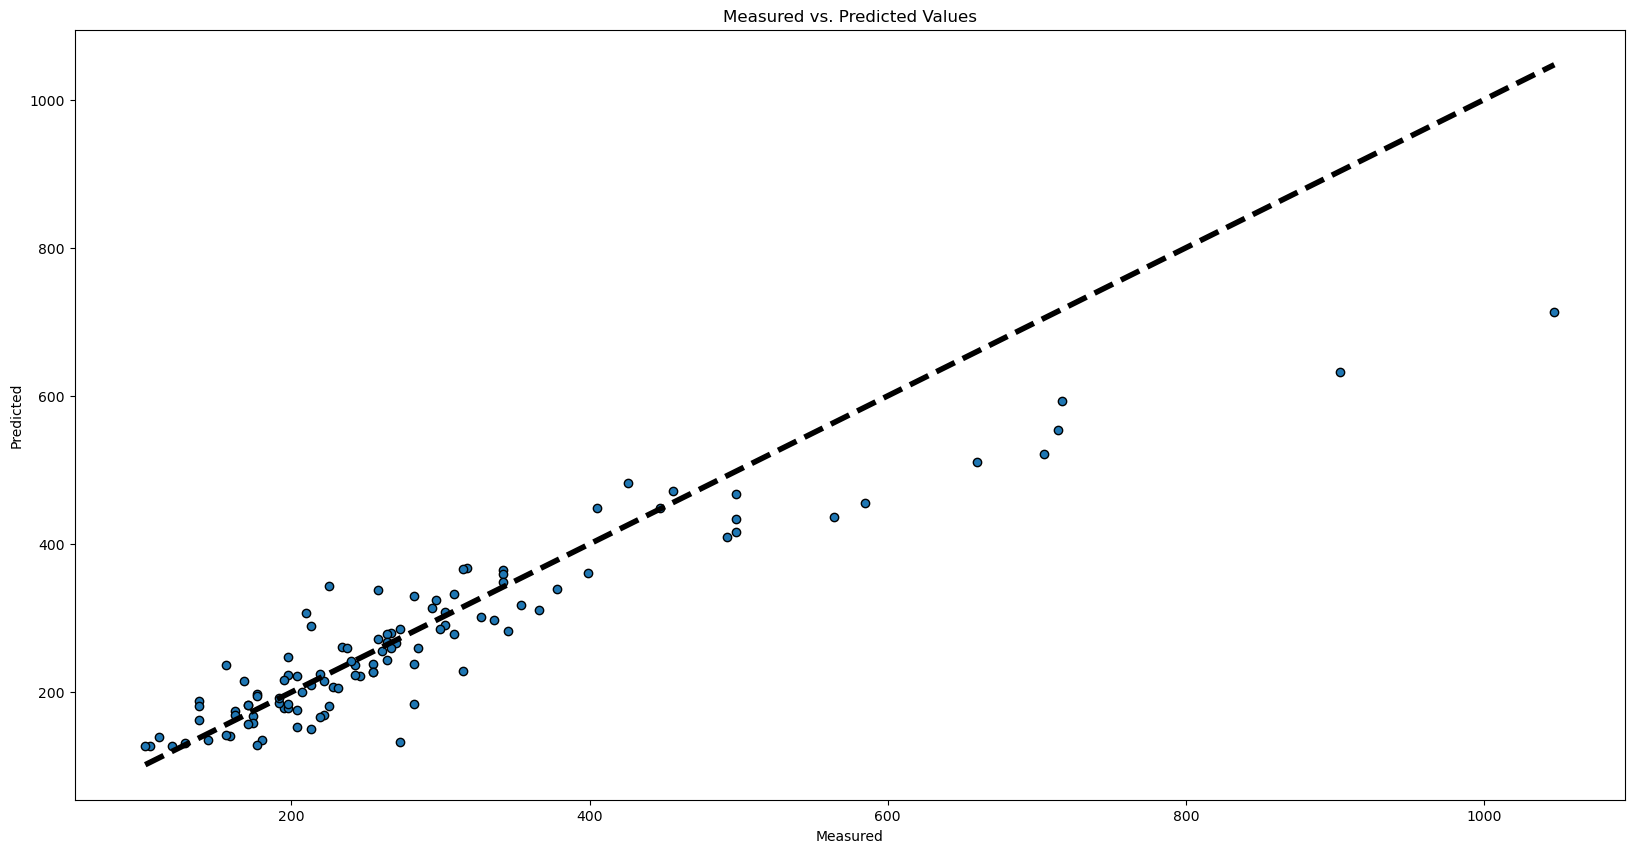

Fold 0 - MSE: 4513.976710975442, MAE: 42.88676057038484, RMLS: 0.18676596463167072, R2: 0.8218493089646555
Best hyperparameters for model 0:
num_layers: 2
units_0: 264
activation_0: elu
l1_reg_0: 8.970515970912853e-05
l2_reg_0: 5.693216160641141e-06
initializer: he_normal
dropout_0: 0.1
units_last: 24
activation_last: elu
l1_reg_last: 0.00014461561302951383
l2_reg_last: 3.210335758733926e-06
initializer_last: he_normal
dropout_last: 0.1
optimizer: rmsprop
learning_rate: 0.01
units_1: 328
activation_1: relu
l1_reg_1: 1.331851193920079e-05
l2_reg_1: 0.00014812689261617563
dropout_1: 0.2
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0142
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 264)            │        26,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 264)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 328)            │        86,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 328)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         7,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,769 (475.66 KB)

 Trainable params: 121,769 (475.66 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


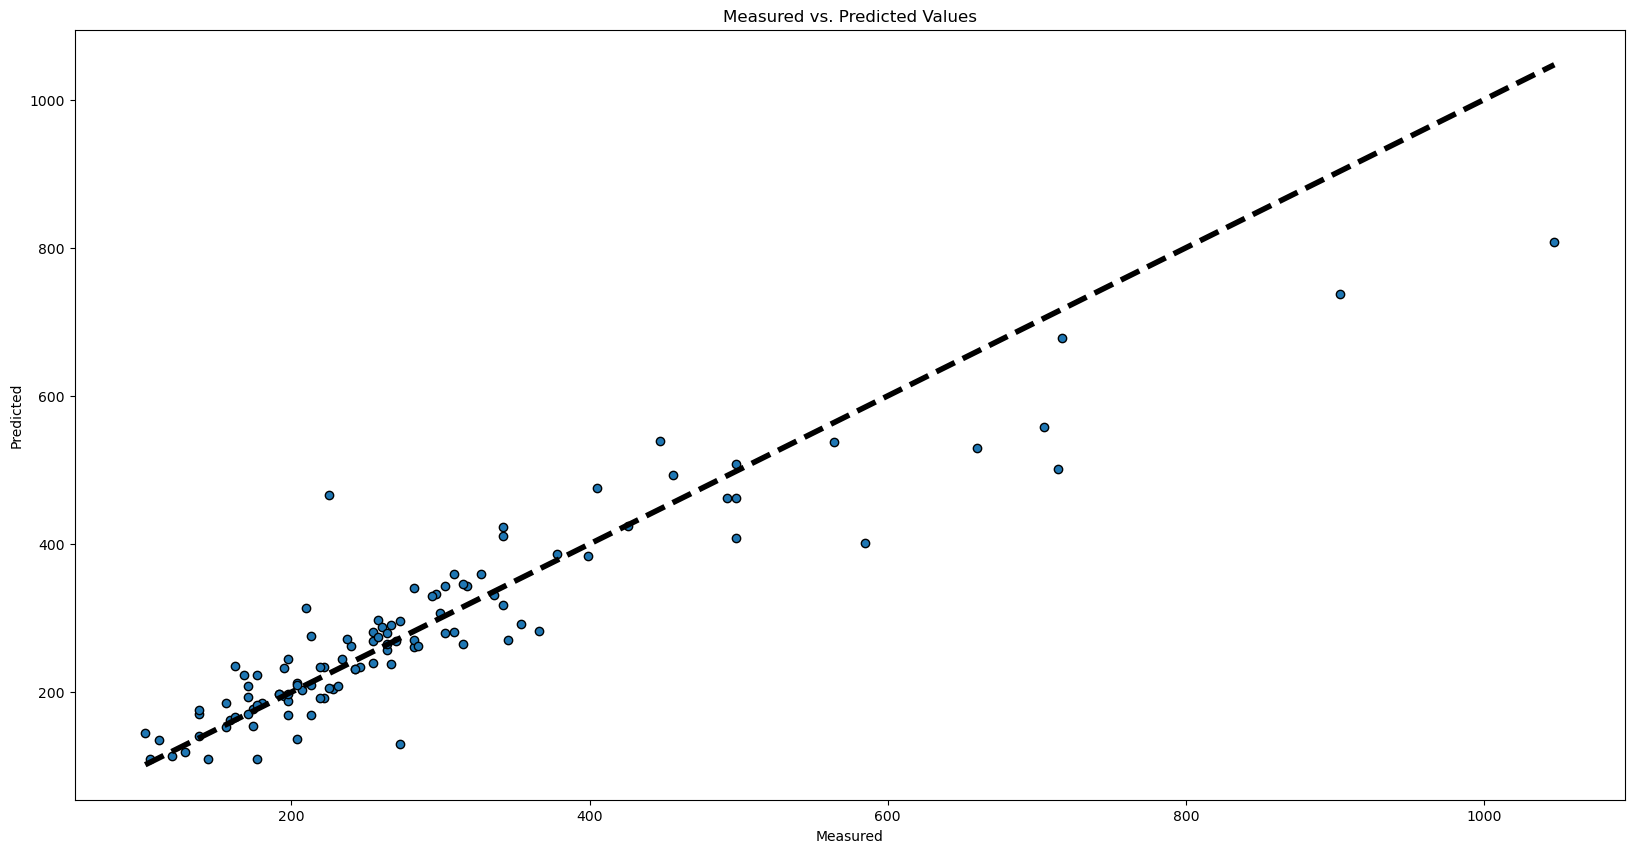

Fold 1 - MSE: 3863.10858499915, MAE: 39.73357391357422, RMLS: 0.1863813083619822, R2: 0.8475367712268388
Best hyperparameters for model 1:
num_layers: 2
units_0: 408
activation_0: selu
l1_reg_0: 1.4716414859642437e-06
l2_reg_0: 2.009039979147754e-06
initializer: glorot_normal
dropout_0: 0.1
units_last: 23
activation_last: selu
l1_reg_last: 0.0017045710973477622
l2_reg_last: 5.190673918908192e-05
initializer_last: glorot_uniform
dropout_last: 0.35000000000000003
optimizer: nadam
learning_rate: 0.01
units_1: 424
activation_1: relu
l1_reg_1: 2.120598156823473e-05
l2_reg_1: 2.87634186676288e-05
dropout_1: 0.0
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0142
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 408)            │        41,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 408)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 424)            │       173,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 424)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         9,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,831 (878.25 KB)

 Trainable params: 224,831 (878.25 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


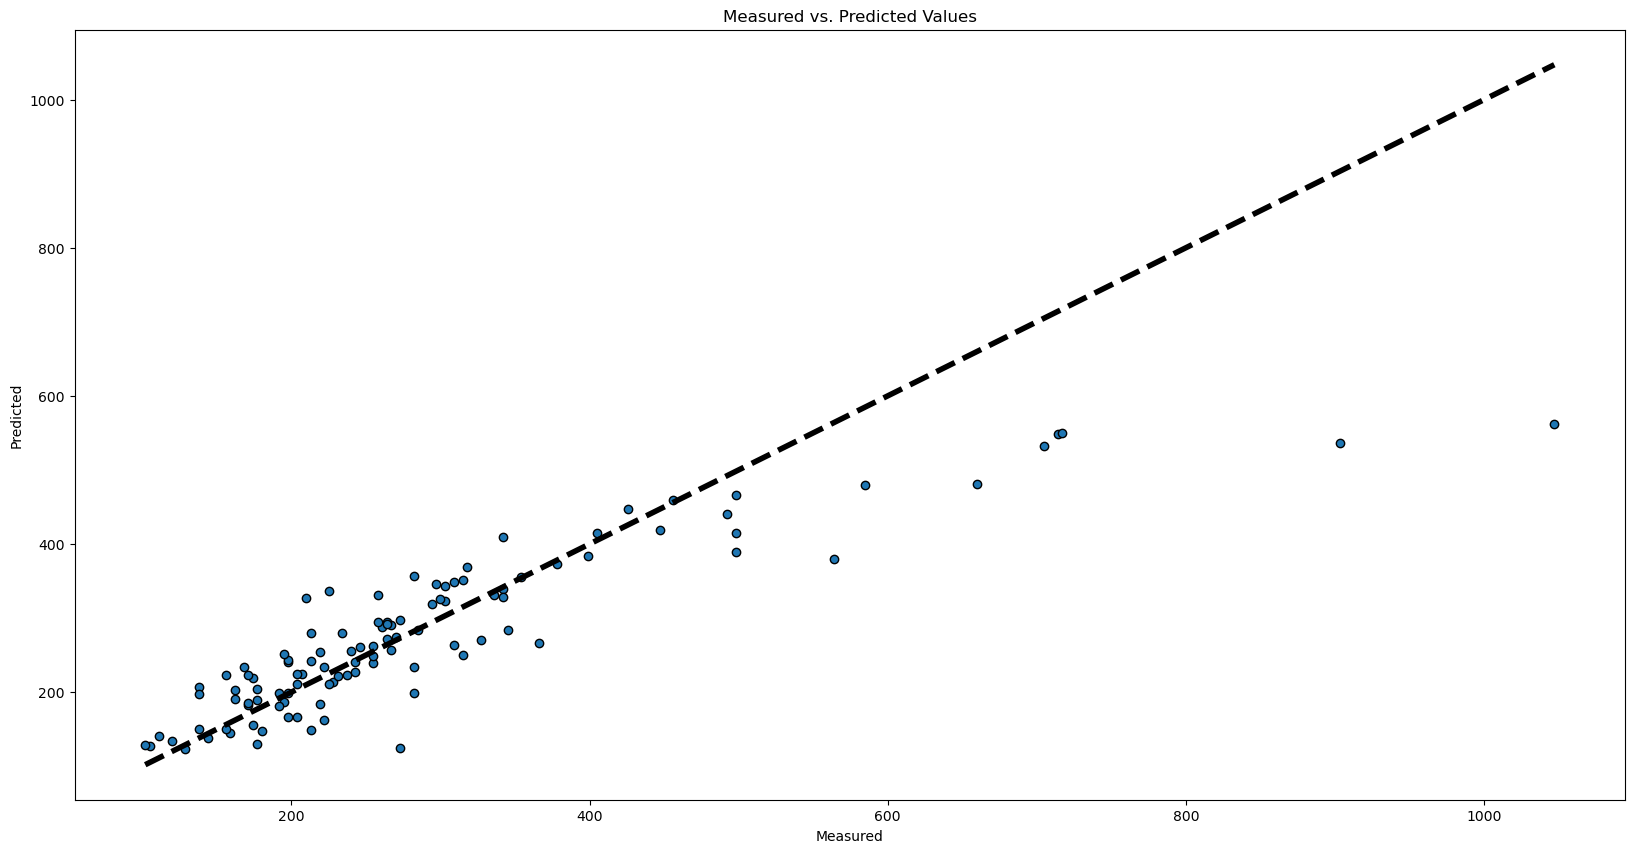

Fold 2 - MSE: 6755.295623056992, MAE: 48.33346048990885, RMLS: 0.20815241431140874, R2: 0.7333923809421734
Best hyperparameters for model 2:
num_layers: 1
units_0: 472
activation_0: relu
l1_reg_0: 1.761054561976864e-06
l2_reg_0: 0.004504352086347769
initializer: glorot_normal
dropout_0: 0.05
units_last: 20
activation_last: selu
l1_reg_last: 9.630709045181227e-05
l2_reg_last: 5.754710296485846e-06
initializer_last: glorot_normal
dropout_last: 0.25
optimizer: adamax
learning_rate: 0.01
units_1: 232
activation_1: selu
l1_reg_1: 0.02241211609783316
l2_reg_1: 0.0004166770069500881
dropout_1: 0.15000000000000002
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0142
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 472)            │        48,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 472)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         9,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,625 (225.10 KB)

 Trainable params: 57,625 (225.10 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


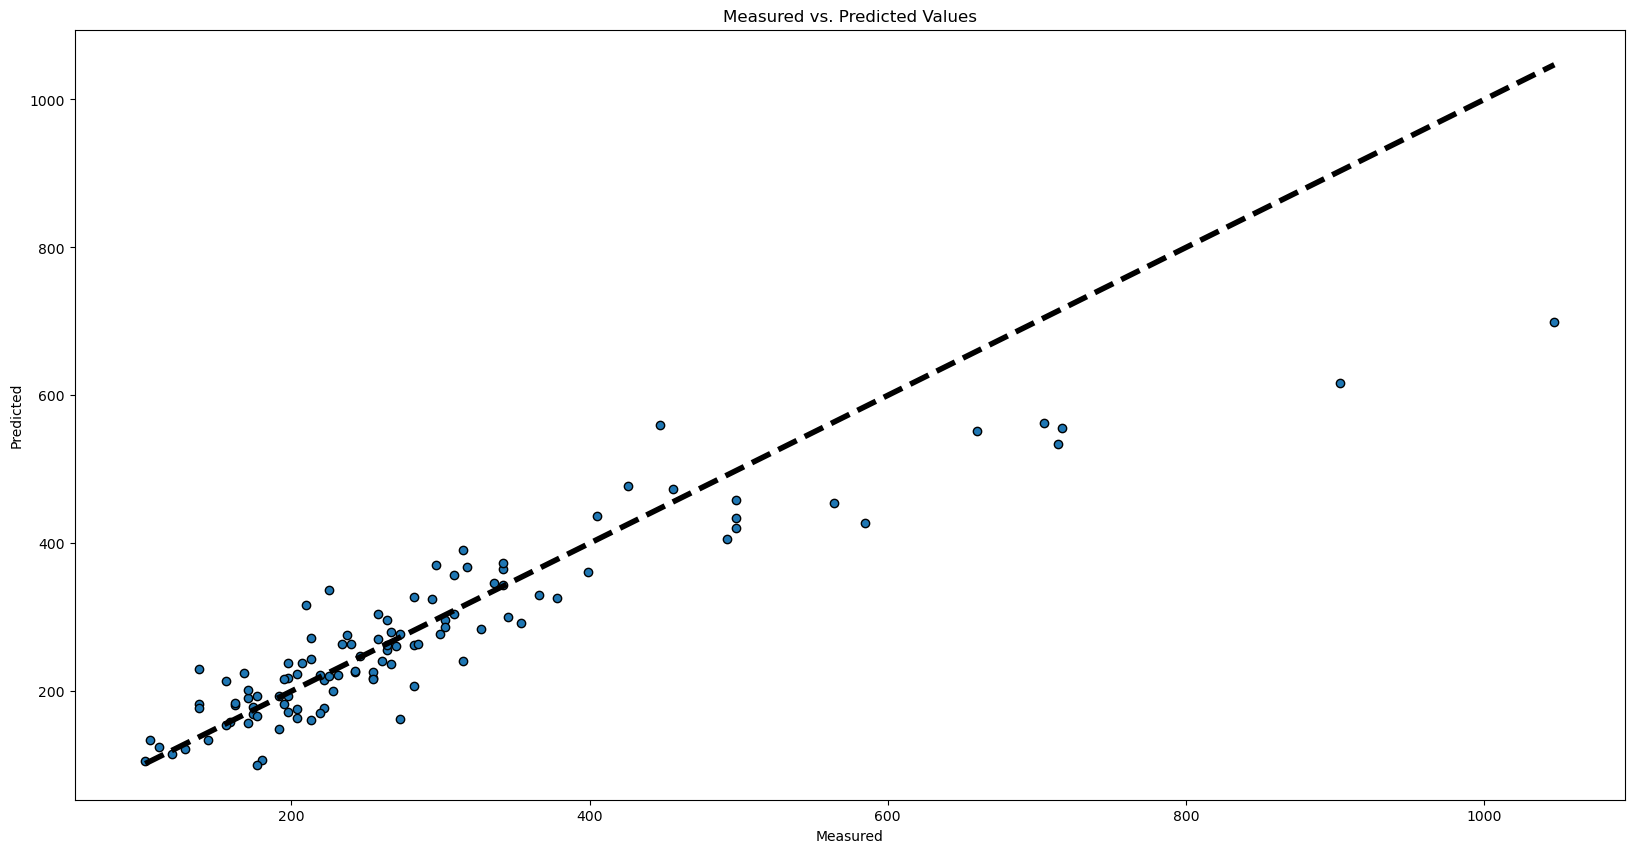

Fold 3 - MSE: 4773.508737136635, MAE: 44.82121841995804, RMLS: 0.19085945885848182, R2: 0.8116064980759771
Best hyperparameters for model 3:
num_layers: 1
units_0: 344
activation_0: elu
l1_reg_0: 1.3104831614795156e-05
l2_reg_0: 6.79910967853817e-06
initializer: lecun_normal
dropout_0: 0.05
units_last: 27
activation_last: elu
l1_reg_last: 1.1488808079905078e-05
l2_reg_last: 5.469526918558915e-05
initializer_last: glorot_uniform
dropout_last: 0.1
optimizer: adamax
learning_rate: 0.01
units_1: 488
activation_1: linear
l1_reg_1: 0.07216414532324064
l2_reg_1: 0.0007082251098729615
dropout_1: 0.25
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0142
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 344)            │        35,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 344)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │         9,315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,431 (173.56 KB)

 Trainable params: 44,431 (173.56 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


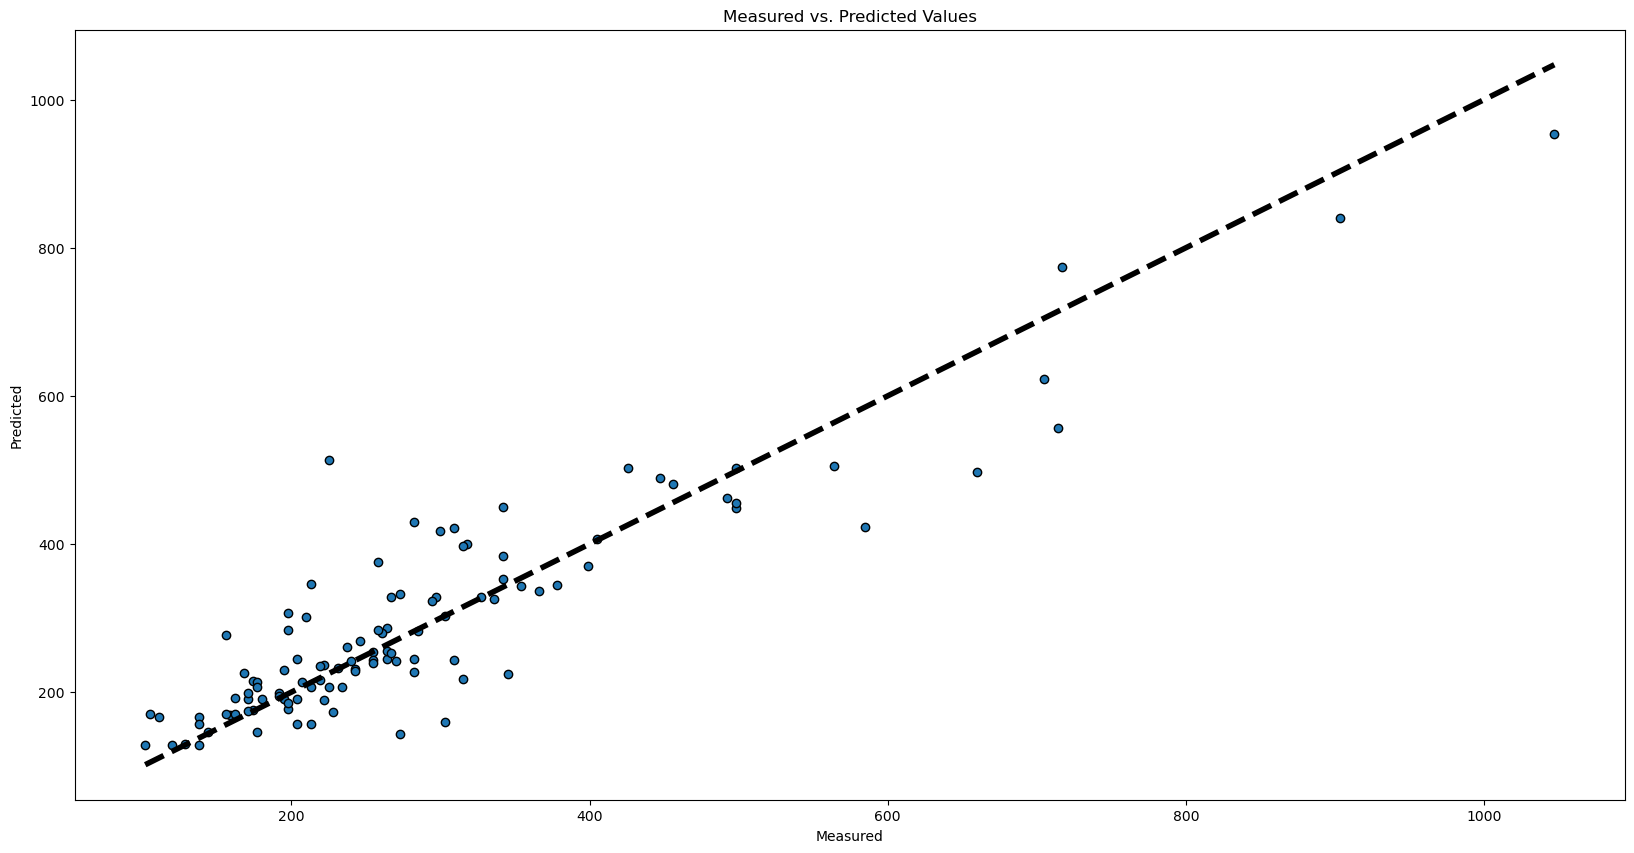

Fold 4 - MSE: 4368.8299107803805, MAE: 45.42586178249783, RMLS: 0.22265724606154538, R2: 0.8275777396615722
Best hyperparameters for model 4:
num_layers: 1
units_0: 104
activation_0: relu
l1_reg_0: 3.873898613419546e-05
l2_reg_0: 1.4022433873086371e-05
initializer: glorot_normal
dropout_0: 0.05
units_last: 21
activation_last: elu
l1_reg_last: 1.2551774010916834e-06
l2_reg_last: 0.00010394289403517574
initializer_last: he_normal
dropout_last: 0.0
optimizer: rmsprop
learning_rate: 0.1
units_1: 168
activation_1: linear
l1_reg_1: 5.623107594533849e-05
l2_reg_1: 1.465480060078858e-06
dropout_1: 0.2
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0203
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 104)            │        10,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         2,205 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,835 (50.14 KB)

 Trainable params: 12,835 (50.14 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# TODO lisää sns y ja predicted jakaumat x-y reunoille ja keskelle R2, MSE, MAE
search_time_end = time.time()
print(f"Hyperband search took {str(timedelta(seconds=(search_time_start-search_time_end)))} ")

# Tulosetaan kaikki tulokset alkuun
# for idx, (mae, mse, rmsle, r2) in enumerate(zip(mae_scores, mse_scores, rmsle_scores, r2_scores), start=1):
#     print(f"Model {idx} - MAE: {mae}, MSE: {mse}, RMLS: {rmsle} R2: {r2}")

# Käydään vielä eri mallit lävitse selvyyden vuoksi
for idx, model in enumerate(models_hyperband):

    predictions = model.predict(X_test)
    plt.figure(figsize=(20, 10)) 
    plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')  
    plt.ylabel('Predicted') 
    plt.title('Measured vs. Predicted Values')
    plt.show()

    print(f"Fold {idx} - MSE: {mse_scores[idx]}, MAE: {mae_scores[idx]}, RMLS: {rmsle_scores[idx]}, R2: {r2_scores[idx]}")
    hp = best_hyperparameters_hyperband[idx]
    print(f"Best hyperparameters for model {idx}:")
    for key in hp.values:
        print(f"{key}: {hp.get(key)}")
    print("-" * 50)
    model.summary()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fitting 5 folds for each of 100 candidates, totalling 500 fits
MAE: 37.71722468623408
MSE: 3391.1974847838565
 R2: 0.8661614328043322
RMSLE: 0.18079964062718387
Time taken 0:03:13.607412
Feature shape: (972, 115)


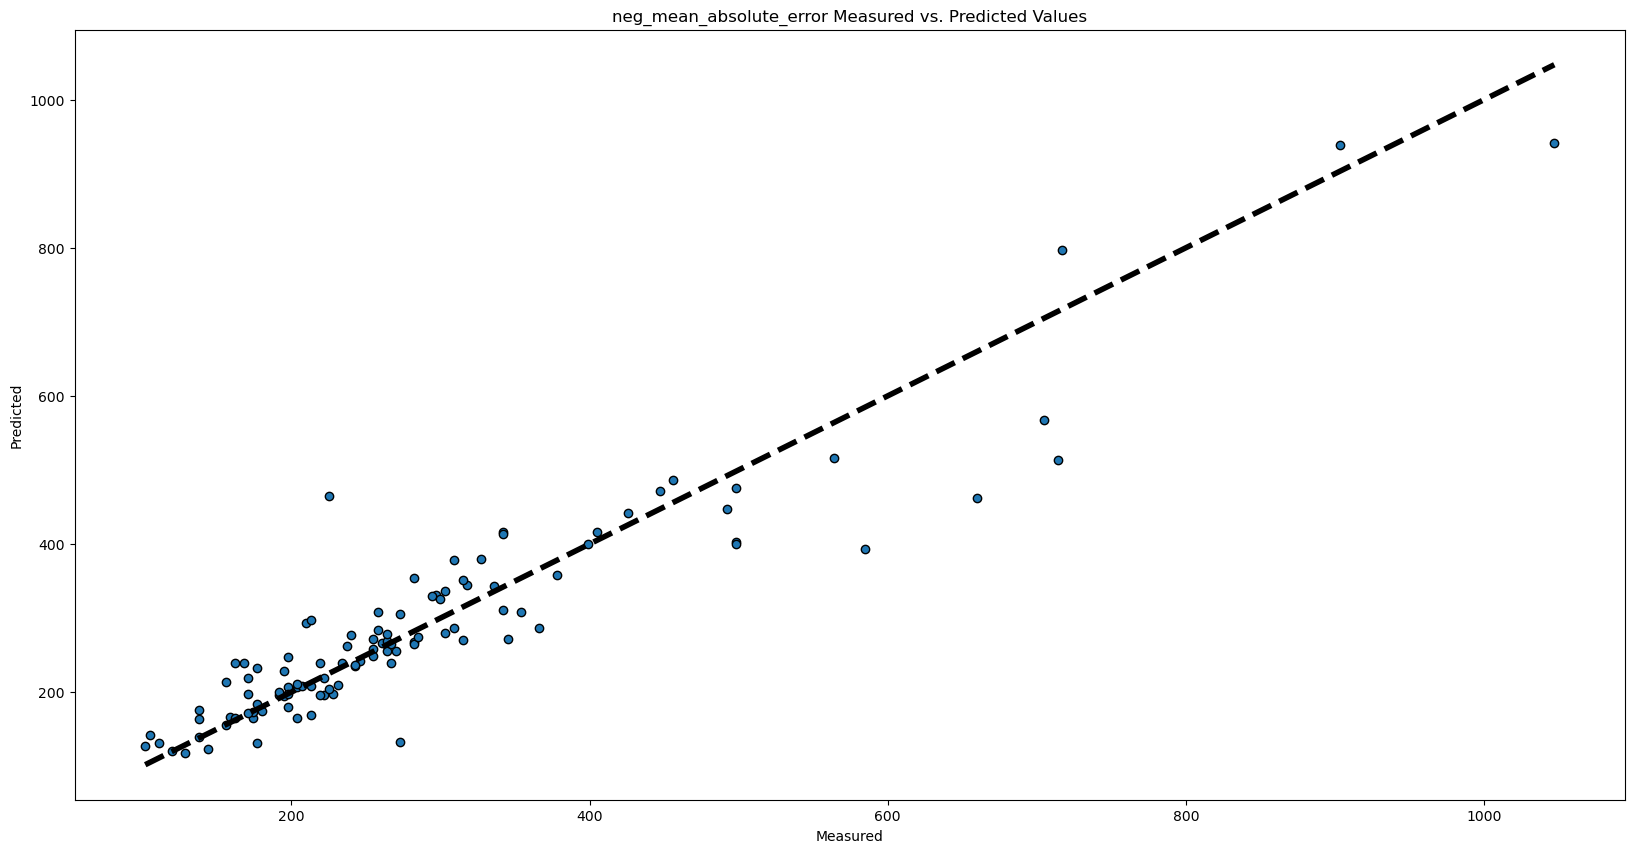

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [28]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Model
from IPython.display import clear_output
from datetime import timedelta

def rmsle(y_true, y_pred):

    if np.any(y_pred <= 0):
        return 1e6

    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Kerätään ensin kaikkien mallien ominaisuusvektorit
X_train_features_list = []
X_test_features_list = []

for model in models_hyperband:
    feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    X_train_features = feature_extractor.predict(X_train)
    X_test_features = feature_extractor.predict(X_test)
    
    X_train_features_list.append(X_train_features)
    X_test_features_list.append(X_test_features)

# Yhdistetään ominaisuusvektorit
X_train_combined = np.concatenate(X_train_features_list, axis=1)
X_test_combined = np.concatenate(X_test_features_list, axis=1)

virhe_mallit = [xgboost.XGBRegressor(objective='reg:absoluteerror'), xgboost.XGBRegressor(objective='reg:squarederror')]
virhe_nimi = ['neg_mean_absolute_error', 'neg_mean_squared_error']

for idx, malli in enumerate(virhe_mallit):
    time_start = time.time()

    xgb = xgboost.XGBRegressor(objective ='reg:squarederror')
    param_space = {
        'n_estimators': np.arange(1, 500, 20),
        'max_depth': np.arange(2, 11),
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 1.5, 2]
    }

    random_search = RandomizedSearchCV(
        estimator=malli,
        param_distributions=param_space,
        cv=5,
        n_jobs=-2,
        n_iter=100,
        verbose=1,
        scoring=rmsle_scorer        
    )

    start_time = time.time()
    random_search.fit(X_train_combined, y_train)
    best_model = random_search.best_estimator_
    end_time = time.time()
    elapsed_time = end_time - start_time

    predictions = best_model.predict(X_test_combined)
    
    time_end = time.time()

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmsle = rmsle_score(y_test, predictions)
    print(f"MAE: {mae}\nMSE: {mse}\nR2: {r2}\nRMSLE: {rmsle}")
    print(f"Time taken {str(timedelta(seconds=(time_end - time_start)))}")
    print(f"Feature shape: {X_train_combined.shape}")

    plt.figure(figsize=(20, 10)) 
    plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')  
    plt.ylabel('Predicted') 
    plt.title(f'{virhe_nimi[idx]} Measured vs. Predicted Values')
    plt.show()




In [ ]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmsle = rmsle_score(y_test, predictions)
print(f"MAE: {mae}\nMSE: {mse}\n R2: {r2}\nRMSLE: {rmsle}")
print(f"Random search took {elapsed_time} seconds")
print(f"Feature shape: {X_train_combined.shape}")

plt.figure(figsize=(20, 10)) 
plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')  
plt.ylabel('Predicted') 
plt.title('Measured vs. Predicted Values NN Hyperband features')
plt.show()

In [ ]:
# import tensorflow as tf
# from keras_tuner import BayesianOptimization
# from keras import regularizers, Sequential, layers, optimizers
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
# import pandas as pd
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 
# from tensorflow import keras
# import time
# from keras import initializers
# import matplotlib.pyplot as plt

# search_time_start = time.time()
# models_bayes = []
# mse_scores = []
# mae_scores = []
# r2_scores = []

# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.Input(shape=(X_train.shape[1],)))

#     # Luodaan kerroksia käyttäen Hyperband-optimoinnin hyperparametreja
#     for i in range(hp.Int('num_layers', 1, 4)):  # Vaihteluväli kerrosten määrälle
#         model.add(layers.Dense(
#             units=hp.Int(f'units_{i}', min_value=8, max_value=512, step=16),
#             activation=hp.Choice(f'activation_{i}', values=['relu', 'linear', 'selu', 'elu', 'sigmoid', 'tanh']),
#             kernel_regularizer=regularizers.l1_l2(
#                 l1=hp.Float(f'l1_reg_{i}', min_value=1e-6, max_value=1e-1, sampling='log'),
#                 l2=hp.Float(f'l2_reg_{i}', min_value=1e-6, max_value=1e-1, sampling='log')),
#             kernel_initializer=hp.Choice('initializer', values=['he_normal', 'glorot_uniform', 'lecun_normal', 'glorot_normal'])
#             )
#         )
#         model.add(layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.05)))

#     model.add(layers.Dense(1, activation='linear'))
#     optimizer_choice = hp.Choice('optimizer', values=['rmsprop', 'nadam', 'adamax', 'adam'])
#     learning_rate = hp.Choice('learning_rate', values=[1.0, 1e-1, 1e-2, 1e-3, 1e-4])
    
#     if optimizer_choice == 'rmsprop':
#         optimizer = optimizers.RMSprop(learning_rate=learning_rate)
#     elif optimizer_choice == 'nadam':
#         optimizer = optimizers.Nadam(learning_rate=learning_rate)
#     elif optimizer_choice == 'adam':
#         optimizer = optimizers.Adam(learning_rate=learning_rate)
#     else:
#         optimizer = optimizers.Adamax(learning_rate=learning_rate)

#     model.compile(optimizer=optimizer, loss='mse')
#     return model

# # Initialize the Bayesian Optimization tuner


# early_stopping_callback = EarlyStopping(
#     monitor='val_loss',
#     patience=10,  # Number of epochs with no improvement after which training will be stopped
#     mode='min',
#     verbose=1
# )

# reduce_lr_callback = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.8,  # New learning rate = learning rate * factor
#     patience=5,  # Number of epochs with no improvement after which learning rate will be reduced
#     min_lr=1e-6,  # Lower bound on the learning rate
#     verbose=1
# )

# terminate_on_nan = TerminateOnNaN()

# best_hyperparameters_bayes = []

# start_time = time.time()
# kf = KFold(n_splits=5)
# models_bayes = []
# round = 0

# fold = 0
# for train_index, val_index in kf.split(X_train):

#     tuner = BayesianOptimization(
#     build_model,
#     objective='val_loss',
#     max_trials=420, 
#     executions_per_trial=1,
#     directory='NN_search',
#     project_name=f'kt_bayesian_fold_{fold}',
#     # overwrite=True, # otetaan pois, niin saan vanhat tulokset mukaan
#     max_consecutive_failed_trials=10,
#     max_retries_per_trial = 0
# )
    
#     X_train_b, X_val_b = X_train[train_index], X_train[val_index]    
#     y_train_b, y_val_b = y_train[train_index], y_train[val_index]
#     y_train_b = tf.data.Dataset.from_tensor_slices(y_train_b)
#     X_train_b = tf.data.Dataset.from_tensor_slices(X_train_b)
#     train_dataset = tf.data.Dataset.zip((X_train_b, y_train_b)).batch(64)
#     train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
    
#     tuner.search(
#         train_dataset,
#         epochs=300,
#         validation_data=(X_val_b, y_val_b),
#         callbacks=[early_stopping_callback, reduce_lr_callback, terminate_on_nan],
#         verbose=2
#     )

  
#     best_model = tuner.get_best_models(num_models=1)[0]
#     models_bayes.append(best_model)
#     best_hyperparameters_bayes.append(tuner.get_best_hyperparameters(num_trials=1)[0])

#     predictions = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
#     r2 = r2_score(y_test, predictions)
    
#     # Tallenna suorituskykymetriikat
#     mse_scores.append(mse)
#     mae_scores.append(mae)
#     r2_scores.append(r2)
#     fold += 1





In [ ]:

# search_time_end = time.time()
# print(f"Bayesian search took {search_time_end - search_time_start} seconds")

# # Tulosetaan kaikki tulokset alkuun
# for idx, (mae, mse, r2) in enumerate(zip(mae_scores, mse_scores, r2_scores), start=1):
#     print(f"Model {idx} - MAE: {mae}, MSE: {mse}, R2: {r2}")

# # Käydään vielä eri mallit lävitse selvyyden vuoksi
# for idx, model in enumerate(models_bayes):

#     predictions = model.predict(X_test)
#     plt.figure(figsize=(20, 10)) 
#     plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
#     plt.xlabel('Measured')  
#     plt.ylabel('Predicted') 
#     plt.title('Measured vs. Predicted Values')
#     plt.show()

#     print(f"Fold {idx} - MSE: {mse_scores[idx]}, MAE: {mae_scores[idx]}, R2: {r2_scores[idx]}")
#     hp = best_hyperparameters_bayes[idx]
#     print(f"Best hyperparameters for model {i+1}:")
#     for key in hp.values:
#         print(f"{key}: {hp.get(key)}")
#     print("-" * 50)
#     model.summary()

In [ ]:
# import xgboost
# from sklearn.model_selection import RandomizedSearchCV
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from keras.models import Model

# # Kerätään ensin kaikkien mallien ominaisuusvektorit
# X_train_features_list = []
# X_test_features_list = []

# for model in models_bayes:
#     feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)
#     X_train_features = feature_extractor.predict(X_train)
#     X_test_features = feature_extractor.predict(X_test)
    
#     X_train_features_list.append(X_train_features)
#     X_test_features_list.append(X_test_features)

# # Yhdistetään ominaisuusvektorit
# X_train_combined = np.concatenate(X_train_features_list, axis=1)
# X_test_combined = np.concatenate(X_test_features_list, axis=1)

# xgb = xgboost.XGBRegressor(objective ='reg:squarederror')
# param_space = {
#     'n_estimators': np.arange(1, 500, 20),
#     'max_depth': np.arange(2, 11),
#     'learning_rate': [0.1, 0.01, 0.001],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 1.5, 2]
# }

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_space,
#     cv=5,
#     n_jobs=-2,
#     n_iter=100,
#     verbose=2
# )

# start_time = time.time()
# random_search.fit(X_train_combined, y_train)
# best_model = random_search.best_estimator_
# end_time = time.time()
# elapsed_time = end_time - start_time

# predictions = best_model.predict(X_test_combined)




In [ ]:
# mse = mean_squared_error(y_test, predictions)
# mae = mean_absolute_error(y_test, predictions)
# r2 = r2_score(y_test, predictions)
# print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")
# print(f"Random search took {elapsed_time} seconds")
# print(f"Feature shape: {X_train_combined.shape}")

# plt.figure(figsize=(20, 10)) 
# plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.xlabel('Measured')  
# plt.ylabel('Predicted') 
# plt.title('Measured vs. Predicted Values NN Bayesian features')
# plt.show()